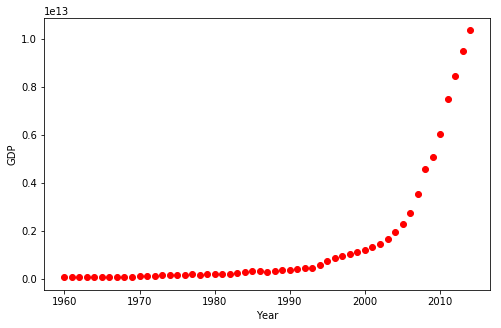

 beta_1 = 723.006148, beta_2 = 0.997142


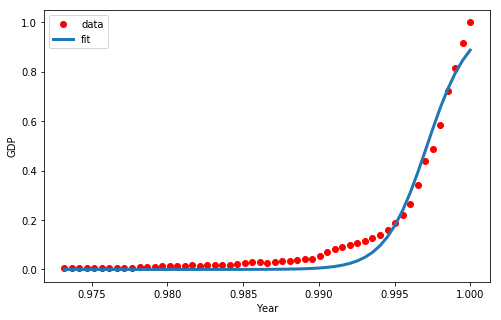

8     0.977160
12    0.979146
22    0.984111
31    0.988580
32    0.989076
37    0.991559
41    0.993545
48    0.997021
49    0.997517
Name: Year, dtype: float64
8     5.316795e-07
12    2.235007e-06
22    8.096906e-05
31    2.044713e-03
32    2.925206e-03
37    1.735256e-02
41    6.910305e-02
48    4.781093e-01
49    5.674296e-01
Name: Year, dtype: float64


In [52]:
import numpy as np
import pandas as pd
df = pd.read_csv("china_gdp.csv")
df.head(10)
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"], df["Value"])
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, train_x, train_y)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
#x = np.linspace(1960, 2015, 55)
#x = x/max(x)
y_hat = sigmoid(test_x, *popt)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(xdata,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
print(test_x)
print(y_hat)